In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pylab
import seaborn as sns; sns.set(color_codes=True)
from matplotlib.colors import ListedColormap
import networkx as nx
from numpy import nan
import math
import sys
import os

In [2]:
df = pd.read_pickle('ml_data_out.pkl')
df.dropna(axis=0, how='any',inplace=True)

In [3]:
features = ['out_degree_centrality', 'in_degree_centrality','closeness_centrality', 'betweenness_centrality', 'eigenvector_centrality','harmonic_centrality',
            'average_neighbor_degree','square_clustering','core_number','pagerank', 'hubs','authorities', 'out_degree2015', 'in_degree2015']

In [4]:
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

In [5]:
X = df[features]
y = df['dummy_outdegree']

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state =0)
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# GDBT

In [7]:
from  sklearn.ensemble  import  GradientBoostingClassifier
from sklearn.metrics import recall_score, accuracy_score

In [8]:
model = GradientBoostingClassifier()
model.fit(X_train_scaled, y_train)
predicted_gdbt = model.predict(X_test_scaled )
accuracy_score(y_test, predicted_gdbt)

0.6777231777231777

In [9]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error
from sklearn.datasets import make_friedman1

In [10]:
model = GradientBoostingRegressor()
model.fit(X_train_scaled, y_train)
predicted_gbr = model.predict(X_test_scaled)
#mean_squared_error(y_test, predicted_gbr)
predicted_gbr = [int(item>0.5) for  item in predicted_gbr]
accuracy_score(y_test, predicted_gbr)

0.685913185913186

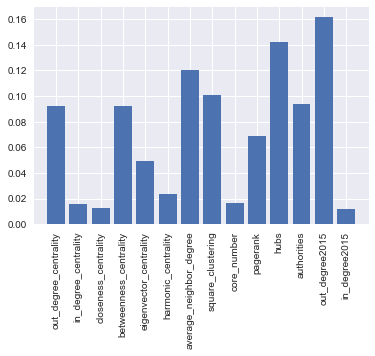

In [11]:
importance = model.feature_importances_

plt.figure()
plt.bar(range(X.shape[1]), importance)
plt.xticks(range(X.shape[1]), features, rotation = 'vertical')
plt.xlim([-1, X.shape[1]])
#plt.show()

pylab.rcParams['figure.figsize'] = (6, 6)
pylab.savefig('feature_importances_out.png', dpi=400, bbox_inches = 'tight')

# XGBoost

In [29]:
import xgboost as xgb
from xgboost import XGBClassifier
model = XGBClassifier()
model.fit(X_train_scaled, y_train)
predicted_xgb = model.predict(X_test_scaled )
#mean_squared_error(y_test, predicted_xgb)
accuracy_score(y_test, predicted_xgb)

/Users/xingkong/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


0.6773136773136773

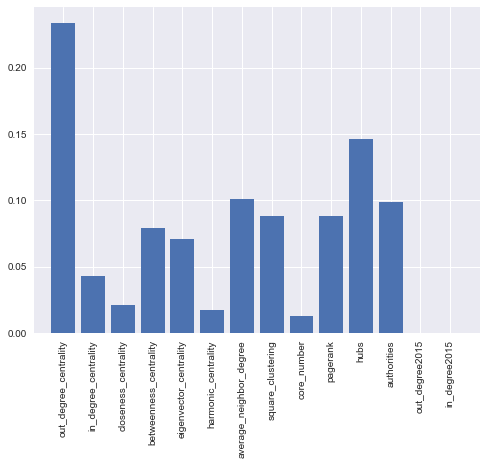

In [32]:
importance = model.feature_importances_

plt.figure()
plt.bar(range(X.shape[1]), importance)
plt.xticks(range(X.shape[1]), features, rotation = 'vertical')
plt.xlim([-1, X.shape[1]])
#plt.show()

pylab.rcParams['figure.figsize'] = (8, 6)
pylab.savefig('feature_importances_out.png', dpi=400, bbox_inches = 'tight')

## MLP Classifier

In [14]:
from sklearn.metrics import recall_score, accuracy_score

In [15]:
clf = MLPClassifier(hidden_layer_sizes = [50,50], alpha=0.0001, activation='relu',
                   random_state = 0, solver='sgd', verbose = 0)
clf.fit(X_train_scaled, y_train)
predicted = clf.predict(X_test_scaled)
accuracy_score(y_test, predicted)

0.6601146601146601

## SVM Classifier

In [16]:
svm = SVC().fit(X_train_scaled, y_train)
predicted_svm = svm.predict(X_test_scaled)
accuracy_score(y_test, predicted_svm)

0.6535626535626535

## LogisticRegression Classifier

In [17]:
from sklearn.linear_model import LogisticRegression

In [18]:
log_reg = LogisticRegression().fit(X_train_scaled, y_train)
predicted_logreg = log_reg.predict(X_test_scaled)
accuracy_score(y_test, predicted_logreg)

0.653972153972154

## SGD Classifier

In [19]:
from sklearn.linear_model import SGDClassifier

In [20]:
sgd_clf = SGDClassifier(penalty='l1').fit(X_train_scaled, y_train)
predicted_sgd = sgd_clf.predict(X_test_scaled)
accuracy_score(y_test, predicted_sgd)

/Users/xingkong/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


0.6523341523341524

## DecisionTree Classifier

In [21]:
from sklearn.tree import DecisionTreeClassifier

In [22]:
tree_clf = DecisionTreeClassifier(max_depth=3).fit(X_train_scaled, y_train)
predicted_tree = tree_clf.predict(X_test_scaled)
accuracy_score(y_test, predicted_tree)

0.6715806715806716

In [23]:
from sklearn.tree import export_graphviz
from sklearn import tree
from IPython.display import Image  
import graphviz
import pydotplus

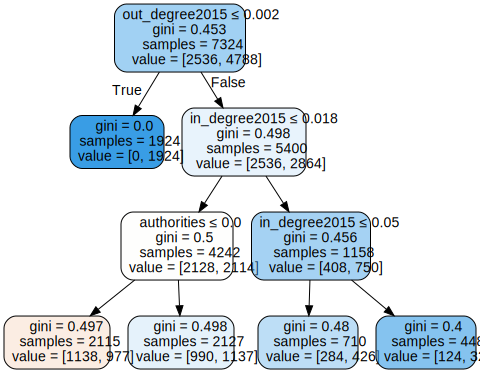

In [24]:
dot_data = tree.export_graphviz(tree_clf, out_file=None, feature_names=features,filled=True, rounded=True,special_characters=True) 
graph = graphviz.Source(dot_data) 
graph

## RandomForest Classifier

In [25]:
from sklearn.ensemble import RandomForestClassifier

In [26]:
clf_forest = RandomForestClassifier(max_depth=2, random_state=0)
clf_forest.fit(X_train_scaled, y_train)
predicted_forest = clf_forest.predict(X_test_scaled)
accuracy_score(y_test, predicted_forest)

0.6629811629811629

In [27]:
from sklearn.metrics import roc_curve

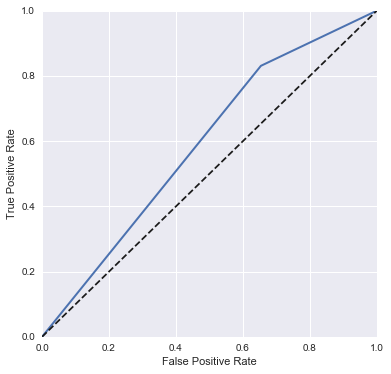

In [28]:
fpr, tpr, thresholds = roc_curve(y_test, predicted_forest)
def plot_roc_curve(fpr,tpr, label=None):
    plt.plot(fpr,tpr,linewidth=2, label=label)
    plt.plot([0,1],[0,1], 'k--')
    plt.axis([0,1,0,1])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
plot_roc_curve(fpr,tpr)
pylab.rcParams['figure.figsize'] = (8, 8)
pylab.savefig('Roc_dt.png', dpi=400, bbox_inches = 'tight')